## **NEW YORK CITY TAXI FARE PREDICITION PROJECT**

## **Importing Libraries** 

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

## **Loading the Dataset**

In [11]:
df = pd.read_csv('/train.xls')



In [12]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...,...
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2


In [13]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


## **Analysing the Data**

In [14]:
df.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [15]:
df.shape

(50000, 8)

In [16]:
df.size


400000

In [17]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [18]:
df.tail()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
49995,2013-06-12 23:25:15.0000004,15.0,2013-06-12 23:25:15 UTC,-73.999973,40.748531,-74.016899,40.705993,1
49996,2015-06-22 17:19:18.0000007,7.5,2015-06-22 17:19:18 UTC,-73.984756,40.768211,-73.987366,40.760597,1
49997,2011-01-30 04:53:00.00000063,6.9,2011-01-30 04:53:00 UTC,-74.002698,40.739428,-73.998108,40.759483,1
49998,2012-11-06 07:09:00.00000069,4.5,2012-11-06 07:09:00 UTC,-73.946062,40.777567,-73.953450,40.779687,2
49999,2010-01-13 08:13:14.0000007,10.9,2010-01-13 08:13:14 UTC,-73.932603,40.763805,-73.932603,40.763805,1


In [19]:
df.sample()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
32556,2014-09-12 07:51:28.0000001,9.5,2014-09-12 07:51:28 UTC,-74.014089,40.716883,-73.999921,40.730972,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   key                50000 non-null  object 
 1   fare_amount        50000 non-null  float64
 2   pickup_datetime    50000 non-null  object 
 3   pickup_longitude   50000 non-null  float64
 4   pickup_latitude    50000 non-null  float64
 5   dropoff_longitude  50000 non-null  float64
 6   dropoff_latitude   50000 non-null  float64
 7   passenger_count    50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [21]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


In [22]:
df.nunique()

key                  50000
fare_amount            703
pickup_datetime      49555
pickup_longitude     33728
pickup_latitude      36609
dropoff_longitude    34893
dropoff_latitude     37428
passenger_count          7
dtype: int64

In [23]:
df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [24]:
#df['key'] = df['key'].astype('string')

In [25]:
df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

## **Data Visualizations**

## **Checking Null Values**

In [26]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [27]:
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [28]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734372,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


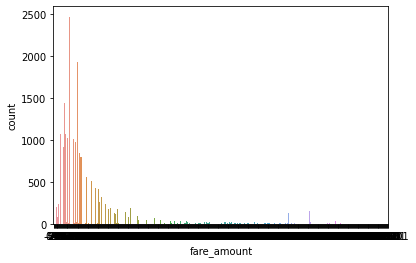

In [29]:
_=sns.countplot(x='fare_amount',data=df)

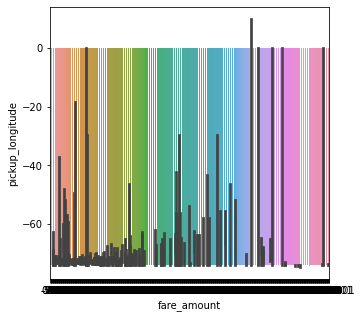

In [30]:
#fare_amount vs pickup_longitude
plot = plt.figure(figsize=(5,5))
sns.barplot(x='fare_amount',y='pickup_longitude',data=df)
plt.show()

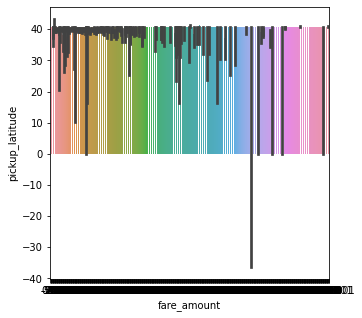

In [31]:
#fare_amount vs pickup_latitude
plot = plt.figure(figsize=(5,5))
sns.barplot(x='fare_amount',y='pickup_latitude',data=df)
plt.show()

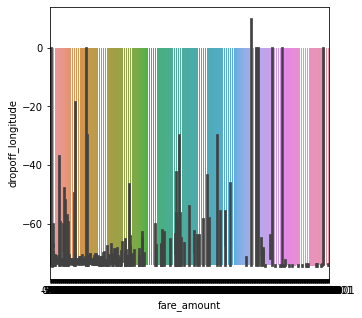

In [32]:
#fare_amount vs dropoff_longitude
plot = plt.figure(figsize=(5,5))
sns.barplot(x='fare_amount',y='dropoff_longitude',data=df)
plt.show()

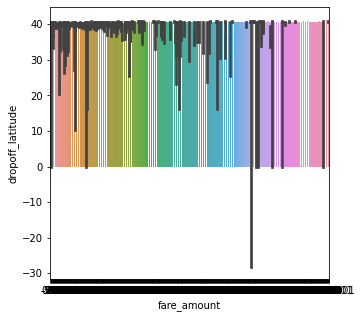

In [33]:
#fare_amount vs dropoff_latitude
plot = plt.figure(figsize=(5,5))
sns.barplot(x='fare_amount',y='dropoff_latitude',data=df)
plt.show()

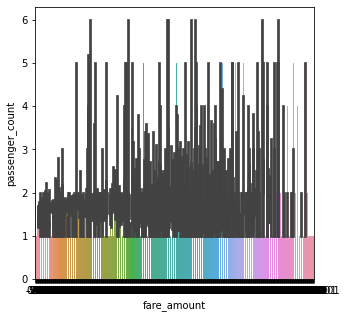

In [34]:
#fare_amount vs passenger_count
plot = plt.figure(figsize=(5,5))
sns.barplot(x='fare_amount',y='passenger_count',data=df)
plt.show()

In [35]:
num_col = ['fare_amount','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']

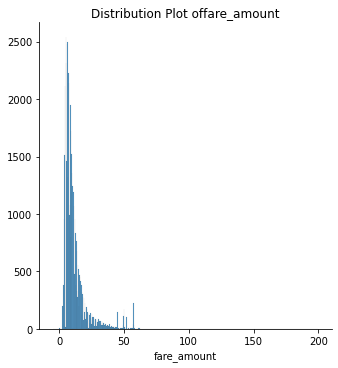

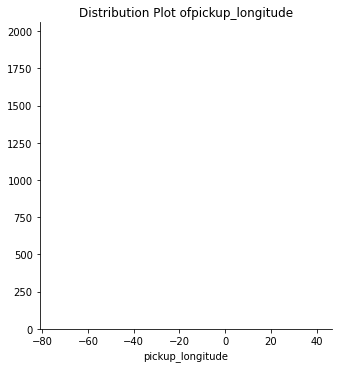

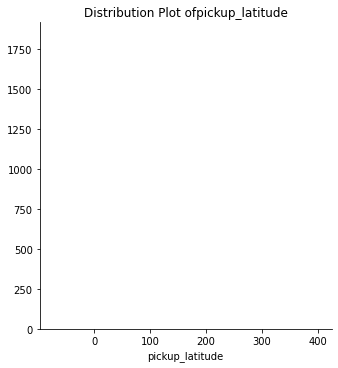

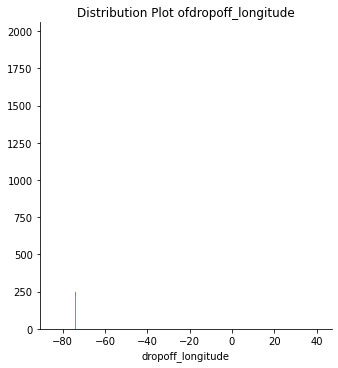

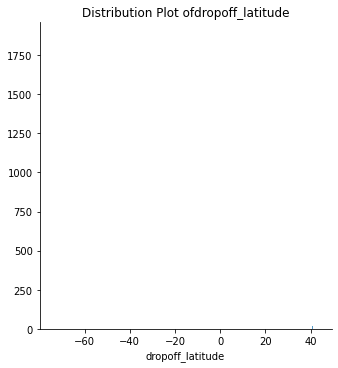

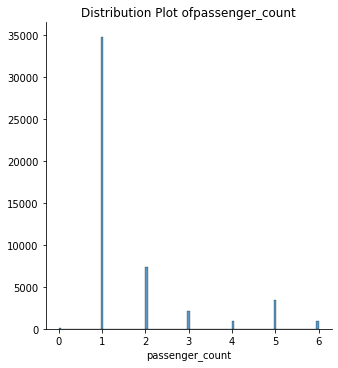

In [36]:
for i in num_col:
    sns.displot(df[i])
    plt.xlabel(i)
    plt.ylabel(None)
    plt.title('Distribution Plot of' +i)
    plt.show()

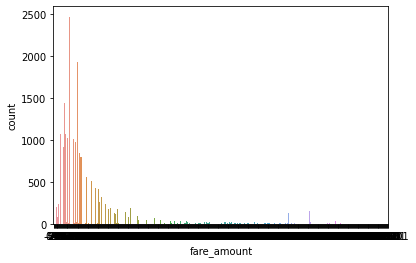

In [37]:
sns.countplot(df['fare_amount'])


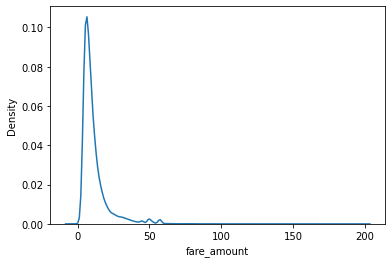

In [38]:
# KDE PLOT
_=sns.kdeplot(x='fare_amount',data=df)

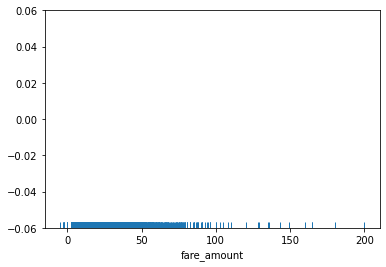

In [39]:
_=sns.rugplot(x='fare_amount',data=df)

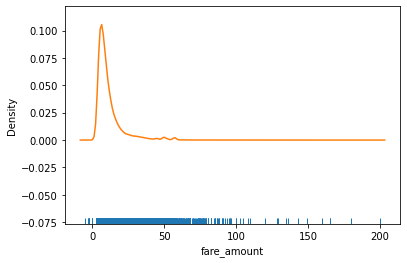

In [40]:
_=sns.rugplot(x='fare_amount',data=df)
_=sns.kdeplot(x='fare_amount',data=df)


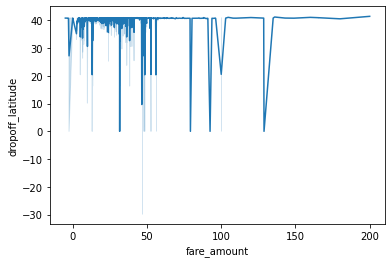

In [41]:
# LINE PLOT
_=sns.lineplot(x='fare_amount', y='dropoff_latitude',data=df)

<Figure size 3600x3600 with 0 Axes>

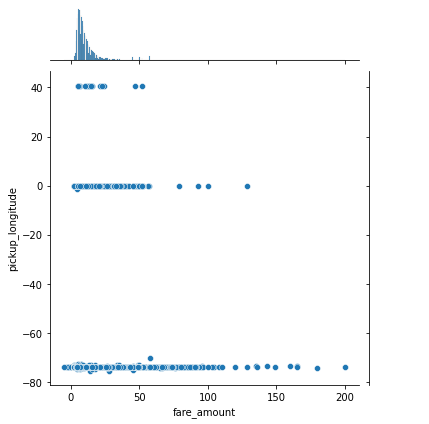

In [42]:
#JOINT PLOT
plt.figure(figsize=(50,50))
_=sns.jointplot(x='fare_amount',y='pickup_longitude',data=df)

<Figure size 1440x720 with 0 Axes>

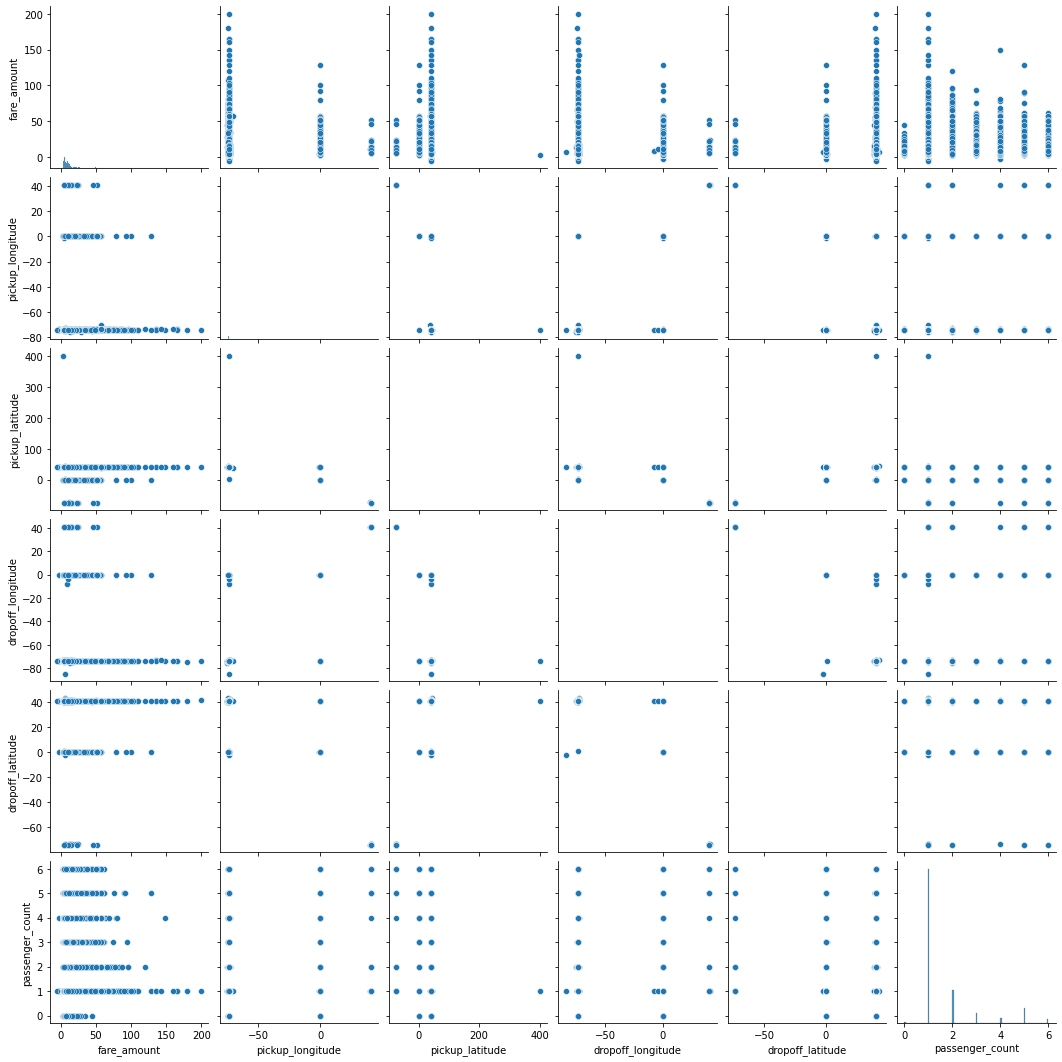

In [43]:
#PAIR PLOT
plt.figure(figsize=(20,10))
_=sns.pairplot(df)

In [44]:
df.drop(['key'],axis=1,inplace=True)

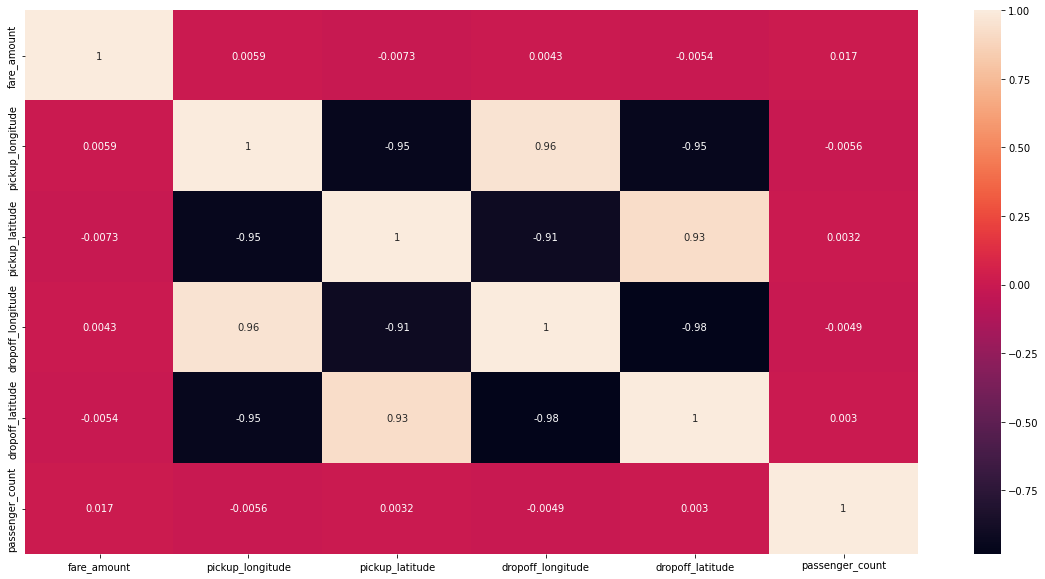

In [45]:
# HEAT MAP
plt.figure(figsize=(20,10))
_=sns.heatmap(df.corr(),annot=True)


## **Dividing the Dataset into x and y**

In [46]:
x = df.drop(['fare_amount','pickup_datetime'],axis=1)
#x= df.drop(['pickup_datetime'], axis =1)
y = df['fare_amount']

In [47]:
x

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,-73.844311,40.721319,-73.841610,40.712278,1
1,-74.016048,40.711303,-73.979268,40.782004,1
2,-73.982738,40.761270,-73.991242,40.750562,2
3,-73.987130,40.733143,-73.991567,40.758092,1
4,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...
49995,-73.999973,40.748531,-74.016899,40.705993,1
49996,-73.984756,40.768211,-73.987366,40.760597,1
49997,-74.002698,40.739428,-73.998108,40.759483,1
49998,-73.946062,40.777567,-73.953450,40.779687,2


In [48]:
x.shape

(50000, 5)

In [49]:
y

0         4.5
1        16.9
2         5.7
3         7.7
4         5.3
         ... 
49995    15.0
49996     7.5
49997     6.9
49998     4.5
49999    10.9
Name: fare_amount, Length: 50000, dtype: float64

In [50]:
y.shape

(50000,)

In [51]:
y=df['fare_amount'].apply(lambda y_value:1 if y_value>=7 else 0)

In [52]:
y

0        0
1        1
2        0
3        1
4        0
        ..
49995    1
49996    1
49997    0
49998    0
49999    1
Name: fare_amount, Length: 50000, dtype: int64

## **Train Test Split**

In [53]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size=0.2,random_state=42)

## **Model Building**

## **RANDOM FOREST**

In [56]:
from sklearn.ensemble import RandomForestClassifier
rt = RandomForestClassifier()
rt.fit(x_train,y_train)

RandomForestClassifier()

## **Predicting Test Result**

In [57]:
y_pred = rt.predict(x_test)

In [58]:
print('Training Score:',100*rt.score(x_train,y_train))
print('Testing Score:',100*rt.score(x_test,y_test))

Training Score: 99.29
Testing Score: 83.265


In [59]:
from sklearn.metrics import accuracy_score

accuracy_test = accuracy_score(y_test , y_pred)
print('Testing Accuracy',accuracy_test)

Testing Accuracy 0.83265


## **PREDICTIVE SYSTEM**

In [63]:
input_data=(-73.844311,	40.721319	,-73.841610	,40.712278,	1)

#changing the input data to nuumpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the data(as prediction is for one instance)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rt.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==1):
    print('Good fare amount')
else:
    print('Bad fare amount')

[1]
Good fare amount


In [64]:
input_data=(-73.982738,	40.761270,	-73.991242,	40.750562,	2)

#changing the input data to nuumpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the data(as prediction is for one instance)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rt.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==1):
    print('Good fare amount')
else:
    print('Bad fare amount')

[0]
Bad fare amount


In [65]:
input_data=(-74.002698,	40.739428,	-73.998108,	40.759483,	1)

#changing the input data to nuumpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the data(as prediction is for one instance)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rt.predict(input_data_reshaped)
print(prediction)

if(prediction[0]==1):
    print('Good fare amount')
else:
    print('Bad fare amount')

[0]
Bad fare amount


## **OTHER METHODS OF MODEL BUILDING**

## **DECISION TREE CLASSIFIER**

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [81]:
y_pred = dt.predict(x_test)
print('Training Score:', 100*dt.score(x_train,y_train))
print('Testing Score:', 100*dt.score(x_test,y_test))

Training Score: 99.29
Testing Score: 76.6625


In [82]:
from sklearn.metrics import accuracy_score

accuracy_test = accuracy_score(y_test,y_pred)
print('Training Accuracy:',accuracy_test)

Training Accuracy: 0.766625


## **PERFORMANCE MATRIX**

In [66]:
from sklearn.metrics import confusion_matrix , classification_report
print('Confusion Matrix:\n ' + str(confusion_matrix(y_pred,y_test)))
print('_________________________')
print('Classification Report:\n ' + str(classification_report(y_pred,y_test)))

Confusion Matrix:
 [[10954  3223]
 [ 3471 22352]]
_________________________
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.77      0.77     14177
           1       0.87      0.87      0.87     25823

    accuracy                           0.83     40000
   macro avg       0.82      0.82      0.82     40000
weighted avg       0.83      0.83      0.83     40000



## **SVM**

In [67]:
from sklearn.svm import SVC
sv_model=SVC()
sv_model.fit(x_train, y_train)

SVC()

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=42)
 

In [69]:
y_pred = sv_model.predict(x_test)
print('Training Score:',100*sv_model.score(x_train,y_train))
print('Testing Score :',100*sv_model.score(x_test,y_test))

Training Score: 64.23
Testing Score : 63.9375


In [70]:
from sklearn.metrics import accuracy_score
accuracy_test = accuracy_score(y_test, y_pred)
print('Testing accuracy',accuracy_test)

Testing accuracy 0.639375


In [71]:
accuracy_test = accuracy_score(y_test, y_pred)
print('Testing accuracy',accuracy_test)


Testing accuracy 0.639375


In [72]:
from sklearn .metrics import confusion_matrix,classification_report
print('Confusion Matrix:\n'+ str(confusion_matrix(y_pred,y_test)))
print('____________________')
print('classification Report:\n'+str(classification_report(y_pred,y_test)))

Confusion Matrix:
[[    0     0]
 [14425 25575]]
____________________
classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.64      0.78     40000

    accuracy                           0.64     40000
   macro avg       0.50      0.32      0.39     40000
weighted avg       1.00      0.64      0.78     40000



# **KNN**

In [73]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [74]:
from sklearn.model_selection import train_test_split
X_train, x_test,y_train,y_test = train_test_split(x,y,train_size=0.2,random_state=42)
y_pred = knn_model.predict(x_test)
print('Training Score:',100*knn_model.score(x_train,y_train))
print('Testing Score :',100*knn_model.score(x_test,y_test))

Training Score: 88.81
Testing Score : 80.1875


In [75]:
from sklearn.metrics import accuracy_score
accuracy_test = accuracy_score(y_test, y_pred)
print('Testing accuracy',accuracy_test)

Testing accuracy 0.801875


In [76]:
accuracy_test = accuracy_score(y_test, y_pred)
print('Testing accuracy',accuracy_test)

Testing accuracy 0.801875


In [77]:
from sklearn .metrics import confusion_matrix,classification_report
print('Confusion Matrix:\n'+ str(confusion_matrix(y_pred,y_test)))
print('____________________')
print('classification Report:\n'+str(classification_report(y_pred,y_test)))


Confusion Matrix:
[[10753  4253]
 [ 3672 21322]]
____________________
classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.73     15006
           1       0.83      0.85      0.84     24994

    accuracy                           0.80     40000
   macro avg       0.79      0.78      0.79     40000
weighted avg       0.80      0.80      0.80     40000

